In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables

In [7]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [8]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table

In [11]:
# Assign the Table(1)-class (hawaii_measurements.csv) to a variables:
Measurement = Base.classes.measurement

In [12]:
# Assign the Table(2)-class (hawaii_stations.csv) to a variables:
Station = Base.classes.station

In [13]:
# Create a session
session = Session(engine)

In [14]:
# Table(1): Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x98ce940>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [15]:
# Table(2): Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x98ec0b8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [16]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

session.query(func.count(Measurement.date)).\
    order_by(Measurement.date).all()

[(19550)]

In [18]:
# Measurement table explored

MaxDate = session.query(func.max(Measurement.date))[0][0]
MinDate = session.query(func.min(Measurement.date))[0][0]
DB_Recs= session.query(func.count(Measurement.date))[0][0]

print(f"Table(Measurement) Most recent date   : {MaxDate}")
print(f"Table(Measurement) Oldest date        : {MinDate}")
print(f"Table(Measurement) Number of records  : {DB_Recs}")

Table(Measurement) Most recent date   : 2017-08-23
Table(Measurement) Oldest date        : 2010-01-01
Table(Measurement) Number of records  : 19550


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# filter(Measurement.date).\
#  filter(Measurement.date.between('01/01/2017', '12/31/2017')).\
# session.query(Measurement.date, Measurement.prcp).\
#     filter(Measurement.date.between('2017-01-01', '2017-12-31')).\
#     filter(Measurement.prcp).\
#     order_by(Measurement.date).all()

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Sort the Table-date (for dataframe) by date

Last_12m = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2017-01-01', '2017-12-31')).\
    filter(Measurement.prcp).\
    order_by(Measurement.date).all()

In [21]:
Last_12m

[('2017-01-01', 0.29),
 ('2017-01-01', 0.03),
 ('2017-01-01', 0.03),
 ('2017-01-02', 0.01),
 ('2017-01-02', 0.01),
 ('2017-01-04', 0.18),
 ('2017-01-05', 0.42),
 ('2017-01-05', 0.06),
 ('2017-01-05', 0.47),
 ('2017-01-06', 0.59),
 ('2017-01-06', 0.01),
 ('2017-01-06', 0.1),
 ('2017-01-06', 0.1),
 ('2017-01-07', 0.06),
 ('2017-01-08', 0.03),
 ('2017-01-08', 0.03),
 ('2017-01-14', 0.01),
 ('2017-01-15', 0.01),
 ('2017-01-18', 0.07),
 ('2017-01-19', 0.02),
 ('2017-01-21', 0.04),
 ('2017-01-21', 0.02),
 ('2017-01-21', 0.11),
 ('2017-01-21', 0.03),
 ('2017-01-21', 0.08),
 ('2017-01-22', 0.16),
 ('2017-01-22', 0.01),
 ('2017-01-22', 0.04),
 ('2017-01-22', 0.09),
 ('2017-01-22', 0.72),
 ('2017-01-23', 0.08),
 ('2017-01-23', 0.01),
 ('2017-01-23', 0.85),
 ('2017-01-24', 0.04),
 ('2017-01-24', 0.15),
 ('2017-01-24', 0.08),
 ('2017-01-24', 0.13),
 ('2017-01-24', 1.85),
 ('2017-01-25', 0.03),
 ('2017-01-25', 0.12),
 ('2017-01-25', 0.79),
 ('2017-01-25', 2.64),
 ('2017-01-26', 0.01),
 ('2017-01-26

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date -- already sorted at query level

Prcp_df = pd.DataFrame(Last_12m).groupby("date").mean()
Prcp_df

,prcp
date,
2017-01-01,0.116667
2017-01-02,0.010000
2017-01-04,0.180000
2017-01-05,0.316667
2017-01-06,0.200000
...,...
2017-08-19,0.090000
2017-08-20,0.010000
2017-08-21,0.290000


In [23]:
# Prcp_df = df.rename(columns={"date":"Date"})
# Prcp_df = df.rename(columns={"prcp":"Precipitation"})
# Prcp_df

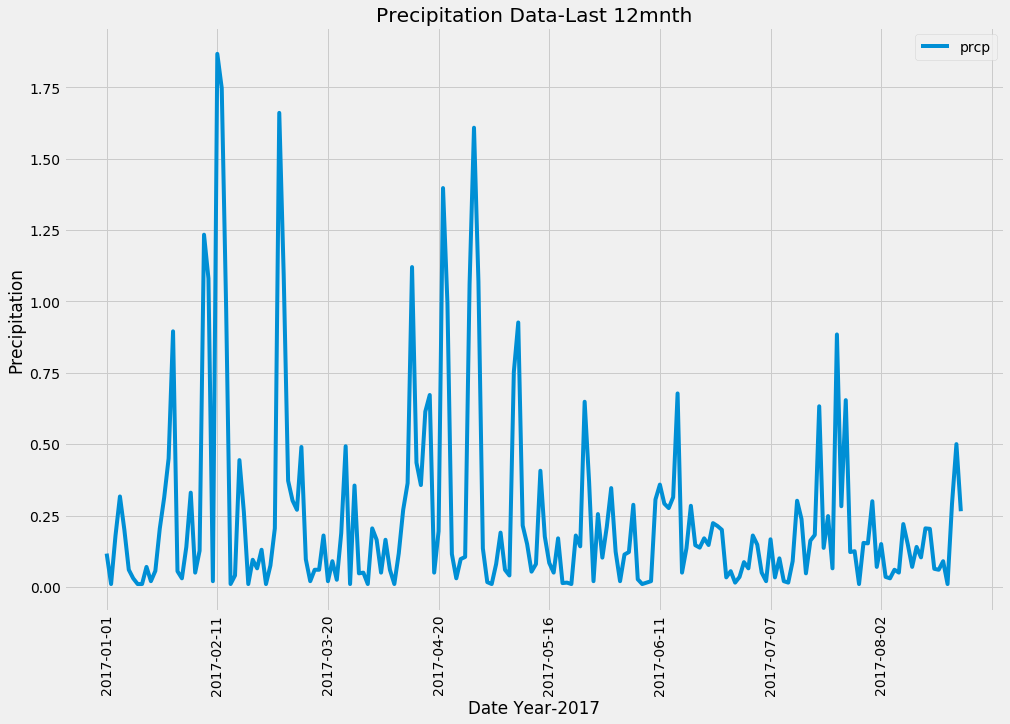

In [24]:
# Measurement: Plot the Last 12 months of precipitation data results
# Use Pandas Plotting with Matplotlib to plot the data

#Prcp_df.plot(rot = 90, title = "Precipitation Data-Last 12mnth")
Prcp_df.plot(rot = 90, title = "Precipitation Data-Last 12mnth", figsize=(15,10))
plt.ylabel("Precipitation")
plt.xlabel("Date Year-2017")
plt.show()

In [25]:
# Measurement: Plot the Last 12 months of precipitation data results
# plt.bar(Prcp_df["date"], Prcp_df["prcp"])

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prcp_df["prcp"].describe

<bound method NDFrame.describe of date
2017-01-01    0.116667
2017-01-02    0.010000
2017-01-04    0.180000
2017-01-05    0.316667
2017-01-06    0.200000
                ...   
2017-08-19    0.090000
2017-08-20    0.010000
2017-08-21    0.290000
2017-08-22    0.500000
2017-08-23    0.265000
Name: prcp, Length: 194, dtype: float64>

In [27]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [28]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT count(station) FROM Station').fetchall()

[(9,)]

In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
engine.execute('SELECT station, count(station) FROM Measurement group by station order by count(station) desc').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

# engine.execute('SELECT station, min(tobs) FROM Measurement').fetchall()
# engine.execute('SELECT station, min(tobs) FROM Measurement where station = "USC00519281").fetchall()
               
MinTemp = session.query(Measurement.station, func.min(Measurement.tobs).\
    filter(Measurement.station == "USC00519281"))
MinTemp[0]

('USC00519281', 54.0)

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#engine.execute('SELECT station, max(tobs) FROM Measurement').fetchall()

MaxTemp = session.query(Measurement.station, func.max(Measurement.tobs).\
    filter(Measurement.station == "USC00519281"))
MaxTemp[0]

('USC00519281', 85.0)

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# average temperature of the most active station?

# engine.execute('SELECT station, avg(tobs) FROM Measurement').fetchall()

AvgTemp = session.query(Measurement.station, func.avg(Measurement.tobs).\
    filter(Measurement.station == "USC00519281"))
AvgTemp[0]

('USC00519397', 71.66378066378067)

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


HiTobsStn_12m = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date.between('2017-01-01', '2017-12-31')).\
    filter(Measurement.tobs).\
    order_by(Measurement.date).all()

HiTobsStn_12m


[('2017-01-01', 72.0),
 ('2017-01-02', 70.0),
 ('2017-01-03', 64.0),
 ('2017-01-04', 63.0),
 ('2017-01-05', 63.0),
 ('2017-01-06', 62.0),
 ('2017-01-07', 70.0),
 ('2017-01-08', 70.0),
 ('2017-01-09', 62.0),
 ('2017-01-10', 62.0),
 ('2017-01-11', 63.0),
 ('2017-01-12', 65.0),
 ('2017-01-13', 69.0),
 ('2017-01-14', 77.0),
 ('2017-01-15', 70.0),
 ('2017-01-16', 74.0),
 ('2017-01-17', 69.0),
 ('2017-01-18', 72.0),
 ('2017-01-19', 71.0),
 ('2017-01-20', 69.0),
 ('2017-01-21', 71.0),
 ('2017-01-22', 71.0),
 ('2017-01-23', 72.0),
 ('2017-01-24', 72.0),
 ('2017-01-25', 69.0),
 ('2017-01-26', 70.0),
 ('2017-01-27', 66.0),
 ('2017-01-28', 65.0),
 ('2017-01-29', 69.0),
 ('2017-01-30', 68.0),
 ('2017-01-31', 68.0),
 ('2017-02-01', 68.0),
 ('2017-02-02', 59.0),
 ('2017-02-03', 60.0),
 ('2017-02-04', 70.0),
 ('2017-02-05', 73.0),
 ('2017-02-06', 75.0),
 ('2017-02-07', 64.0),
 ('2017-02-08', 59.0),
 ('2017-02-09', 59.0),
 ('2017-02-10', 62.0),
 ('2017-02-11', 68.0),
 ('2017-02-12', 70.0),
 ('2017-02-

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A45C358>]],
      dtype=object)

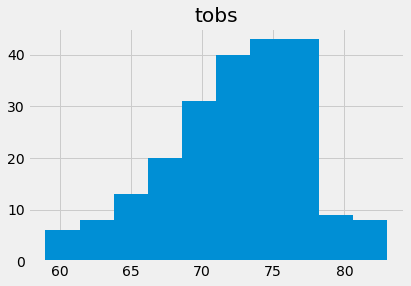

In [34]:
STN_df = pd.DataFrame(HiTobsStn_12m).groupby("date").mean()
STN_df
STN_df.hist()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
